In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Show the first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Get basic info
df.info()

# Check column names and data types
print(df.columns)

# See how many null values
df.isnull().sum()

# Get summary stats for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42258 entries, 0 to 42257
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        42258 non-null  object 
 1   gender            42258 non-null  object 
 2   SeniorCitizen     42258 non-null  int64  
 3   Partner           42258 non-null  object 
 4   Dependents        42258 non-null  object 
 5   tenure            42258 non-null  int64  
 6   PhoneService      42258 non-null  object 
 7   MultipleLines     42258 non-null  object 
 8   InternetService   42258 non-null  object 
 9   OnlineSecurity    42258 non-null  object 
 10  OnlineBackup      42258 non-null  object 
 11  DeviceProtection  42258 non-null  object 
 12  TechSupport       42258 non-null  object 
 13  StreamingTV       42258 non-null  object 
 14  StreamingMovies   42258 non-null  object 
 15  Contract          42258 non-null  object 
 16  PaperlessBilling  42258 non-null  object

,SeniorCitizen,tenure,MonthlyCharges
count,42258.000000,42258.000000,42258.000000
mean,0.162147,32.371149,64.761692
std,0.368590,24.558028,30.088267
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
# See data type of TotalCharges
print("Data type:", df['TotalCharges'].dtype)

# Show rows where TotalCharges is not a number (i.e., blank or invalid)
invalid = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
print("Rows with invalid TotalCharges:")
print(invalid[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])


Data type: object
Rows with invalid TotalCharges:
       customerID  tenure  MonthlyCharges TotalCharges
488    4472-LVYGI       0           52.55             
753    3115-CZMZD       0           20.25             
936    5709-LVOEQ       0           80.85             
1082   4367-NUYAO       0           25.75             
1340   1371-DWPAZ       0           56.05             
...           ...     ...             ...          ...
39041  3213-VVOLG       0           25.35             
39595  2520-SGTTA       0           20.00             
40433  2923-ARZLG       0           19.70             
41885  4075-WKNIU       0           73.35             
41969  2775-SEFEE       0           61.90             

[66 rows x 4 columns]


In [33]:
# Convert TotalCharges to numeric and drop rows where conversion failed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with null TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42192 entries, 0 to 42257
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        42192 non-null  object 
 1   gender            42192 non-null  object 
 2   SeniorCitizen     42192 non-null  int64  
 3   Partner           42192 non-null  object 
 4   Dependents        42192 non-null  object 
 5   tenure            42192 non-null  int64  
 6   PhoneService      42192 non-null  object 
 7   MultipleLines     42192 non-null  object 
 8   InternetService   42192 non-null  object 
 9   OnlineSecurity    42192 non-null  object 
 10  OnlineBackup      42192 non-null  object 
 11  DeviceProtection  42192 non-null  object 
 12  TechSupport       42192 non-null  object 
 13  StreamingTV       42192 non-null  object 
 14  StreamingMovies   42192 non-null  object 
 15  Contract          42192 non-null  object 
 16  PaperlessBilling  42192 non-null  object 
 17

In [34]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df = df.drop('customerID', axis=1)


In [36]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']


In [37]:
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


C:\Users\user\AppData\Local\Temp\ipykernel_8952\2946260329.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [38]:
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaymentMethod']


In [39]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [40]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42192 entries, 0 to 42257
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 42192 non-null  int64  
 1   SeniorCitizen                          42192 non-null  int64  
 2   Partner                                42192 non-null  int64  
 3   Dependents                             42192 non-null  int64  
 4   tenure                                 42192 non-null  int64  
 5   PhoneService                           42192 non-null  int64  
 6   PaperlessBilling                       42192 non-null  int64  
 7   MonthlyCharges                         42192 non-null  float64
 8   TotalCharges                           42192 non-null  float64
 9   Churn                                  42192 non-null  int64  
 10  MultipleLines_No phone service         42192 non-null  bool   
 11  Multipl

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [42]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


X:\Installation\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)


In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [47]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)
evaluate_model("Random Forest", y_test, rf_preds)



🔹 Logistic Regression
Accuracy: 0.804242208792511
Confusion Matrix:
 [[5586  624]
 [1028 1201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      6210
           1       0.66      0.54      0.59      2229

    accuracy                           0.80      8439
   macro avg       0.75      0.72      0.73      8439
weighted avg       0.80      0.80      0.80      8439


🔹 Decision Tree
Accuracy: 0.9972745585969902
Confusion Matrix:
 [[6202    8]
 [  15 2214]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6210
           1       1.00      0.99      0.99      2229

    accuracy                           1.00      8439
   macro avg       1.00      1.00      1.00      8439
weighted avg       1.00      1.00      1.00      8439


🔹 Random Forest
Accuracy: 0.9972745585969902
Confusion Matrix:
 [[6199   11]
 [  12 2217]]
Classification Re

In [48]:
!pip install joblib


In [49]:
import joblib

# Save random forest model (you can change this to whichever is best for you)
joblib.dump(rf_model, '../models/random_forest_model.pkl')

# Save the scaler used for logistic regression
joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
import joblib

# Save random forest model (you can change this to whichever is best for you)
joblib.dump(rf_model, '../models/random_forest_model.pkl')

# Save the scaler used for logistic regression
joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']

In [52]:
# Load model and scaler
loaded_model = joblib.load('../models/random_forest_model.pkl')
loaded_scaler = joblib.load('../models/scaler.pkl')

# Make predictions again
X_new_scaled = loaded_scaler.transform(X_test)
preds = loaded_model.predict(X_new_scaled)


X:\Installation\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
# Skip using scaler — use original test data
X_new = X_test
preds = loaded_model.predict(X_new)


In [54]:
# Load model and scaler
loaded_model = joblib.load('../models/random_forest_model.pkl')
loaded_scaler = joblib.load('../models/scaler.pkl')

# Make predictions again
X_new_scaled = loaded_scaler.transform(X_test)
preds = loaded_model.predict(X_new_scaled)


X:\Installation\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


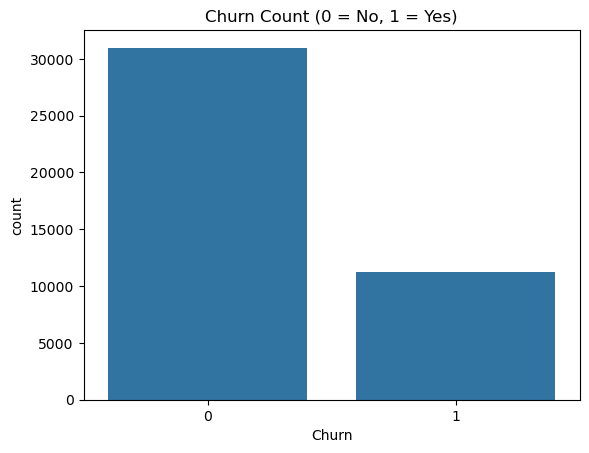

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Count (0 = No, 1 = Yes)')
plt.show()


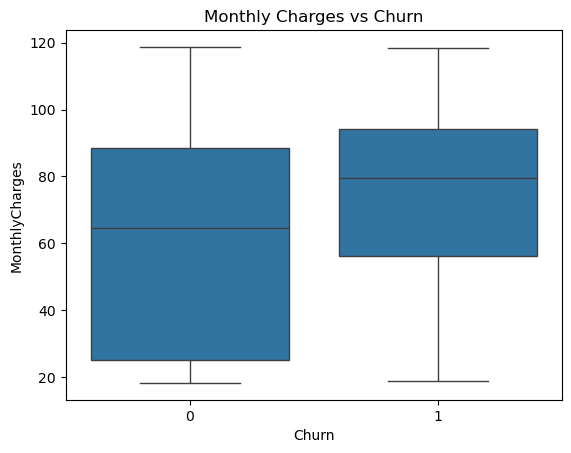

In [56]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


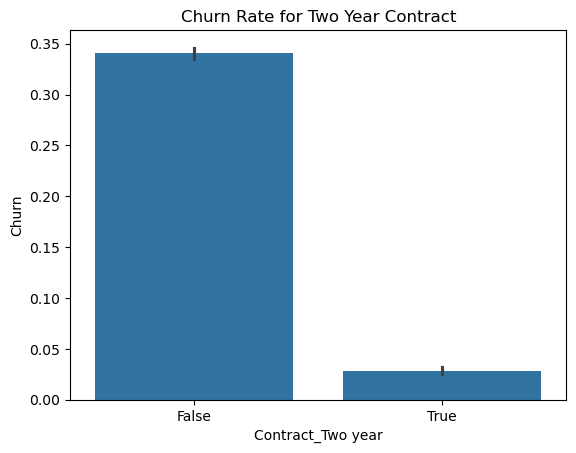

In [57]:
sns.barplot(x='Contract_Two year', y='Churn', data=df)
plt.title('Churn Rate for Two Year Contract')
plt.show()
